In [8]:
import numpy as np
from scipy.fftpack import fft, ifft
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from pylab import *


from time import perf_counter
import pandas as pd

%matplotlib qt

In [2]:
#Vectorised Code
def evalfreqfftvect(time_sec, vibr):
    datalength_fft = len(time_sec)
    datalengthby2 = int(datalength_fft/2)
    timeavgcalc = np.array([], dtype = float64)
    time_sec_i = time_sec[1:]
    time_sec_i_1 = time_sec[:-1]
    timeavgcalc = time_sec_i- time_sec_i_1
    sigint_avg = np.mean(timeavgcalc)
    siginf = 1/(datalength_fft*sigint_avg)
    freqhztemp = np.arange(0,datalength_fft,dtype = float64)
    freqhz = freqhztemp*siginf
    freqhz = freqhz[0:datalengthby2]
    vibr_fft = np.abs(fft(vibr,axis = -1))
    vibr_fft = ((vibr_fft[0:datalengthby2])/datalength_fft)*2
    return freqhz,vibr_fft, max(freqhz)*2

In [3]:
#read signal
gasforce1 = pd.read_csv('gasforce1.tab', header = None, skiprows = 1, delimiter = '\t')
gasforce1_fft_adams = pd.read_csv('gasforce1_fft_adams.tab', header = None, skiprows = 1, delimiter = '\t')
speedvstime = pd.read_csv('speedvstime.tab', header = None, skiprows = 1, delimiter = '\t')

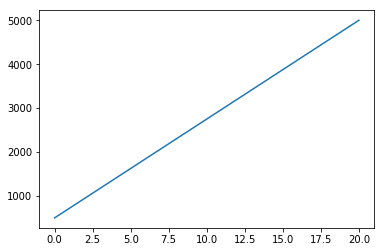

In [4]:
plt.plot(speedvstime[0],speedvstime[1])
plt.show()

In [5]:
gasforce1

,0,1
0,0.000121,20.5422
1,0.000242,277.0020
2,0.000364,767.8620
3,0.000485,1575.9800
4,0.000606,2668.0700
5,0.000727,4030.7700
6,0.000848,6537.2800
7,0.000970,8479.0500
8,0.001091,11725.3000
9,0.001212,15274.8000


In [ ]:
gasforce1[0].values[1] - gasforce1[0].values[0]

In [ ]:
gasforce1[0].values[2] - gasforce1[0].values[1]

In [ ]:
gasforce1[0].values[3] - gasforce1[0].values[2]

In [ ]:
time_sec_i = np.delete(gasforce1[0].values,len(gasforce1[0].values)-1)

In [ ]:
time_sec_i_1 = np.delete(gasforce1[0].values,0)

In [ ]:
timeavgcalc = time_sec_i_1- time_sec_i

In [ ]:
sigint_avg = np.mean(timeavgcalc)
sigint_avg

In [ ]:
plt.plot(gasforce1[0],gasforce1[1])
plt.show()

In [9]:
plt.plot(gasforce1_fft_adams[0].values,gasforce1_fft_adams[1].values)
plt.plot(gasforce1_fft_sl[0],gasforce1_fft_sl[1], "--")
plt.show()

In [6]:
gasforce1_fft_sl = evalfreqfftvect(gasforce1[0].values,gasforce1[1].values)

In [11]:
gasforce1_fft_adams.drop(gasforce1_fft_adams.tail(1).index,inplace=True)

In [12]:
difference_freq = (gasforce1_fft_sl[0] - gasforce1_fft_adams[0].values)


In [13]:
difference_fft = (gasforce1_fft_sl[1] - gasforce1_fft_adams[1].values)

In [14]:
len(gasforce1_fft_sl[0])

82499

In [15]:
len(gasforce1_fft_adams[0])

82499

In [16]:
gasforce1_fft_adams[1].values

array([1.120652e+04, 1.257923e+03, 7.210245e+02, ..., 8.508930e-01,
       8.282623e-01, 6.071168e-01])

In [17]:
plt.plot(gasforce1_fft_sl[0], difference_fft)
#plt.plot(gasforce1_fft_sl[0], gasforce1_fft_sl[1])
#plt.plot(gasforce1_fft_sl[0], gasforce1_fft_adams[1].values, "--")
plt.show()

In [18]:
len(gasforce1_fft_sl[1]),len(gasforce1_fft_adams[1])

(82499, 82499)

In [19]:
plt.plot(gasforce1_fft_sl[0], gasforce1_fft_sl[1])
plt.plot(gasforce1_fft_sl[0], gasforce1_fft_adams[1].values)
plt.show()

In [20]:
gasforce1_fft_sl[1], gasforce1_fft_adams[1].values

(array([1.12068468e+04, 1.25786581e+03, 7.20834438e+02, ...,
        5.38154702e-01, 5.88821660e-01, 5.84099932e-01]),
 array([1.120652e+04, 1.257923e+03, 7.210245e+02, ..., 8.508930e-01,
        8.282623e-01, 6.071168e-01]))

In [ ]:
plt.plot(gasforce1_fft_sl[0],gasforce1_fft_sl[1])
plt.show()

In [ ]:
gasforce1_ifft_sl = ifft(gasforce1_fft_sl[1])

In [ ]:
len(gasforce1_ifft_sl)

In [ ]:
plt.plot(abs(gasforce1_ifft_sl))
plt.show()

In [ ]:
def eval_rms_ampl(time_sec, speed_rpm, vibr):
    datalength = len(speed_rpm)
    crankanglecum = np.array([0], dtype = float64)
    for i in np.arange(1, datalength):
        crankanglecum = np.append(crankanglecum, (crankanglecum[i-1]+(((speed_rpm[i-1]/2)/60)*360*(time_sec[i]-time_sec[i-1]))))
    cycle = np.array([1], dtype = int)
    crankanglerel = np.array([0], dtype = float64)
    for i in np.arange(1,datalength):
        cycle = (np.append(cycle, np.floor(((crankanglecum[i]/720.0))+1)))
        crankanglerel = np.append(crankanglerel, (crankanglecum[i]-(cycle[i]-1)*720))
    maxcy = max(cycle)
    alldata = np.stack((cycle, time_sec, speed_rpm, vibr), axis = 1)
    e, inds = np.unique(alldata[:,0], return_index=True)
    alldata_cycle = np.split(alldata, inds)[1:]
    speedindex = np.array([], dtype = float64)
    rms_vibr = np.array([], dtype = float64)
    ampl_vibr = np.array([], dtype = float64)
    time_interval = np.array([], dtype = float64)
    freqhz3d = np.array([], dtype = float64)
    vibrfft3d = np.array([], dtype = float64)
    fs = = np.array([], dtype = float64)
    for i in np.arange(0,maxcy):
        y = int(i)
        speedindex = (np.append(speedindex,(np.mean(alldata_cycle[y][:,2]))))
        rms_vibr = (np.append(rms_vibr,(np.sqrt(np.mean(np.square((alldata_cycle[y][:,3])))))))
        ampl_vibr = (np.append(ampl_vibr,((max(((alldata_cycle[y][:3])))-min(((alldata_cycle[y][:,3]))))/2)))
        freqhztemp,vibrtemp,fstemp = eval_freqfft(alldata_cycle[y][:,1],alldata_cycle[y][:,3])
        freqhz3d = np.hstack((freqhz3d,freqhztemp))
        vibrfft3d = np.hstack((vibrfft3d,vibrtemp))
    freqvibr3d = np.transpose(np.vstack((freqhz3d, vibrfft3d)))
    freqvibr3dspl = np.split(freqvibr3d, np.argwhere(freqvibr3d[:,0] == 0.0).flatten()[1:])
    freqvibr3d_freq_interp = np.array([], dtype = float64)
    freqvibr3d_vibr_interp = np.array([], dtype = float64)
    for y in np.arange(0,int(maxcy)):
        funcakimainterp = interpolate.Akima1DInterpolator(freqvibr3dspl[y][:,0], freqvbr3dspl[y][:1])
        freqvibr3d_freq_interptemp = np.arange(0,(ceil(max(freqvibr3dspl[int{maxcy}-1][:,0]))+10),10)
        freqvibr3d_vibr_interptemp = funcakimainterp(freqvibr3d_freq_interptemp)
        freqvibr3d_freq_interp = np.append(freqvibr3d_freq_interp, freqvibr3d_freq_interptemp)
        freqvibr3d_vibr_interp = np.append(freqvibr3d_vibr_interp, freqvibr3d_vibr_interptemp)
    freqvibr3dv2 = np.transpose(np.vstack((freqvibr3d_freq_interp, freqvibr3d_vibr_interp)))
    freqvibr3dsplv2 = np.split(freqvibr3dv2, np.argwhere(freqvibr3dv2[:,0] == 0.0).flatten()[1:])
    temponesval = int(len(freqvibr3dsplv2[0]))
    freqvibr3dsplv2x = np.array([], dtype = float64)
    freqvibr3dsplv2y = np.array([], dtype = float64)
    freqvibr3dsplv2z = np.array([], dtype = float64)
    for i in arange(0,int(max(cycle))):
        freqvibr3dsplv2x = np.vstack((freqvibr3dsplv2x,freqvibr3dsplv2x[i][:,0]))
        freqvibr3dsplv2y = np.vstack((freqvibr3dsplv2y,speedindex[i]*np.ones(temponesval)))
        freqvibr3dsplv2z = np.vstack((freqvibr3dsplv2z,freqvibr3dsplv2[i],[:,1]))
    freqvibr3dsplv2x = np.delete(freqvibr3dsplv2x,0,0)
    freqvibr3dsplv2y = np.delete(freqvibr3dsplv2y,0,0)
    freqvibr3dsplv2z = np.delete(freqvibr3dsplv2z,0,0)
    return speedindex,rms_vibr,ampl_vibr,cycle,freqvibr3dsplv2x,freqvibr3dsplv2y,freqvibr3dsplv2z

In [ ]:
def eval_rms_ampl(time_sec, speed_rpm, vibr):
    datalength = len(speed_rpm)
    crankanglecum = np.array([0], dtype = float64)
    for i in np.arange(1, datalength):
        crankanglecum = np.append(crankanglecum,
                                  (crankanglecum[i-1]+(((speed_rpm[i-1]/2)/60)*360*(time_sec[i]-time_sec[i-1]))))
    cycle = np.array([1], dtype = int)
    crankanglerel = np.array([0], dtype = float64)
    for i in np.arange(1,datalength):
        cycle = (np.append(cycle, np.floor(((crankanglecum[i]/720.0))+1)))
        crankanglerel = np.append(crankanglerel, (crankanglecum[i]-(cycle[i]-1)*720))
    return cycle, crankanglerel, crankanglecum

In [ ]:
t1_start = time.perf_counter()
trial1 = eval_rms_ampl(gasforce1[0],speedvstime[1],gasforce1[1])
t1_end = time.perf_counter()

t2_start = time.perf_counter()
trial2 = eval_rms_ampl(gasforce1[0],speedvstime[1],gasforce1[1])
t2_end = time.perf_counter()

t3_start = time.perf_counter()
trial3 = eval_rms_ampl(gasforce1[0],speedvstime[1],gasforce1[1])
t3_end = time.perf_counter()

In [ ]:
t1 = -1*(t1_start - t1_end)
t2 = -1*(t2_start - t2_end)
t3 = -1*(t3_start - t3_end)

In [ ]:
t1,t2,t3

In [ ]:
plt.plot(gasforce1[0],trial1[0])
plt.grid()
plt.show()